In [1]:
import numpy as np
import sympy
import operator
import inspect
import itertools
import functools
from copy import deepcopy

import kwant
import kwant.continuum

/home/tinkerer/kwant/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
%matplotlib inline
import sympy
import matplotlib.pyplot as plt

sympy.init_printing(print_builtin=True)

In [3]:
from kwant.continuum import landau_levels

In [7]:
builder = kwant.continuum.discretize('k_x**2 + k_y**2 + V(x, y) + sqrt(B)')

In [8]:
print(builder)

# Discrete coordinates: x y

# Onsite element:
def onsite(site, B, V):
    (x, y, ) = site.pos
    _const_0 = (V(x, y))
    return (B**(1/2) + _const_0 + 4.0)

# Hopping from (1, 0):
(-1+0j)

# Hopping from (0, 1):
(-1+0j)


In [35]:
a_dag = sympy.symbols('a^\dagger')

In [36]:
a_dag

In [24]:
chain = kwant.lattice.chain()

In [25]:
type(chain(1))

kwant.builder.Site

In [26]:
chain(2)

Site(kwant.lattice.Monatomic([[1.0]], [0.0], '', None), array([2]))

In [17]:
kwant.builder.Site(chain, (1,))

Site(kwant.lattice.Monatomic([[1.0]], [0.0], '', None), array([1]))

In [28]:
s = kwant.builder.Site(chain, (40,))  # Second argument is the tag, for the chain its the position.

In [30]:
s.pos

array([40.0])

In [15]:
kwant.builder.Site?

Init signature: kwant.builder.Site(family, tag, _i_know_what_i_do=False)
Docstring:     
A site, member of a `SiteFamily`.

Sites are the vertices of the graph which describes the tight binding
system in a `Builder`.

A site is uniquely identified by its family and its tag.

Parameters
----------
family : an instance of `SiteFamily`
    The 'type' of the site.
tag : a hashable python object
    The unique identifier of the site within the site family, typically a
    vector of integers.

Raises
------
ValueError
    If `tag` is not a proper tag for `family`.

Notes
-----
For convenience, ``family(*tag)`` can be used instead of ``Site(family,
tag)`` to create a site.

The parameters of the constructor (see above) are stored as instance
variables under the same names.  Given a site ``site``, common things to
query are thus ``site.family``, ``site.tag``, and ``site.pos``.
File:           ~/kwant/kwant/builder.py
Type:           type
Subclasses:     


In [12]:
chain?

Signature:      chain(*tag)
Type:           Monatomic
String form:    <unnamed Monatomic lattice, vectors [1.0], origin [0.0]>
File:           ~/kwant/kwant/lattice.py
Docstring:     
A Bravais lattice with a single site in the basis.

Instances of this class provide the `~kwant.builder.SiteFamily` interface.
Site tags (see `~kwant.builder.SiteFamily`) are sequences of integers and
describe the lattice coordinates of a site.

``Monatomic`` instances are used as site families on their own or as
sublattices of `Polyatomic` lattices.

Parameters
----------
prim_vecs : 2d array-like of floats
    Primitive vectors of the Bravais lattice.

offset : vector of floats
    Displacement of the lattice origin from the real space
    coordinates origin.

Attributes
----------
``offset`` : vector
    Displacement of the lattice origin from the real space coordinates origin
Call docstring:
A convenience function.

This function allows to write fam(1, 2) instead of Site(fam, (1, 2)).


In [4]:
H1 = "k_x**2 + 10*k_y**2"
H2 = "t_1*k_x**2 + t_2*k_y**2 + t_3*k_z**2"
H3 = "sigma_z*k_x**2 + 10*sigma_x*k_y**2"

In [5]:
ll = landau_levels.ll_hamiltonian(H3)

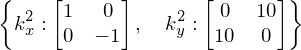

In [6]:
ll.monomials

In [7]:
ll.normal_coordinate == None

True

In [15]:
ll.set_ll_momenta([1, 2])

In [16]:
ll.ll_momenta

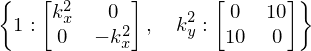

In [17]:
ll.monomials

In [18]:
ll.normal_coordinate

In [19]:
# ll.set_ll_momenta(['k_x', 'k_y'])

In [20]:
ll.normal_coordinate

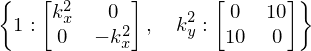

In [21]:
ll.monomials

In [22]:
ll.shape_func

In [23]:
N = 3

In [24]:
ham = ll.hamiltonian_matrix(N)

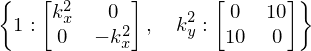

In [25]:
ll.monomials

In [28]:
params = dict(t_1 = 1, t_2 = 2, t_3 = 3, k_x=0)

In [29]:
ham(B=1, params=params).todense()

matrix([[ 0.        +0.j,  5.        +0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j,  7.07106781+0.j],
        [ 5.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j,  7.07106781+0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         15.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  0.        +0.j, 15.        +0.j,
          0.        +0.j,  0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  7.07106781+0.j,  0.        +0.j,
          0.        +0.j,  0.        +0.j, 25.        +0.j],
        [ 7.07106781+0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j, 25.        +0.j,  0.        +0.j]])

In [7]:
H1 = "k_x**2 + 10*k_y**2"
H2 = "t_1*k_x**2 + t_2*k_y**2 + t_3*k_z**2"
H3 = "sigma_z*k_x**2 + 10*sigma_x*k_y**2"

In [6]:
N = 2
ham, monomials = ll_hamiltonian(H3, N, momenta=None)

In [7]:
ham

<function kwant.continuum.landau_levels.combine.<locals>.final_wrapper(*, B, params=None)>

In [8]:
ham(B=1, params=dict(t_1=1, t_2=1, t_3=1)).todense()

matrix([[ 0.5+0.j,  5. +0.j,  0. +0.j,  0. +0.j],
        [ 5. +0.j, -0.5+0.j,  0. +0.j,  0. +0.j],
        [ 0. +0.j,  0. +0.j,  1.5+0.j, 15. +0.j],
        [ 0. +0.j,  0. +0.j, 15. +0.j, -1.5+0.j]])

In [9]:
monomials

{k_x**2: <function __main__.ll_hamiltonian.<locals>.<lambda>.<locals>.<lambda>(params=None)>,
 k_y**2: <function __main__.ll_hamiltonian.<locals>.<lambda>.<locals>.<lambda>(params=None)>}

In [10]:
funcs = list(monomials.values())

In [11]:
funcs[0]

<function __main__.ll_hamiltonian.<locals>.<lambda>.<locals>.<lambda>(params=None)>

In [12]:
# funcs[0]().todense()

In [13]:
params = dict(t_1 = 1, t_2=1, t_3=1)
for key, value in monomials.items():
    print(key, value(params=params).todense())

k_x**2 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]
k_y**2 [[ 0.+0.j 10.+0.j]
 [10.+0.j  0.+0.j]]


In [60]:
f1 = lambda x, y=1, z=2: x*y + z
f2 = lambda l, y=1, z=2: l*y + z

In [61]:
funcs = [f1, f2]

In [62]:
combine(operator.add, funcs, args_names=None)

<function __main__.combine.<locals>.final_wrapper(*, l, x, y=1, z=2)>

In [15]:
('N_1', None) == ('N_2', None)

False

In [81]:
H = "k_x**2 + k_y**2 + k_z**2"

In [87]:
disc = kwant.continuum.discretize(H, coords=['y', 'z'])

In [88]:
disc

In [89]:
for site in disc.sites():
    print(site.pos)

[0.0 0.0]


In [71]:
fsyst = disc.finalized()

In [74]:
fsyst.hamiltonian_submatrix()

array([[ 2.+0.j, -1.-0.j],
       [-1.+0.j,  2.+0.j]])

In [16]:
l = ['a', 'b', 'c', 'd']
inds = [0, 3]

TypeError: zip argument #1 must support iteration